### Part a) : Ordinary Least Square (OLS) on the Franke function

### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from script import FrankeFunction

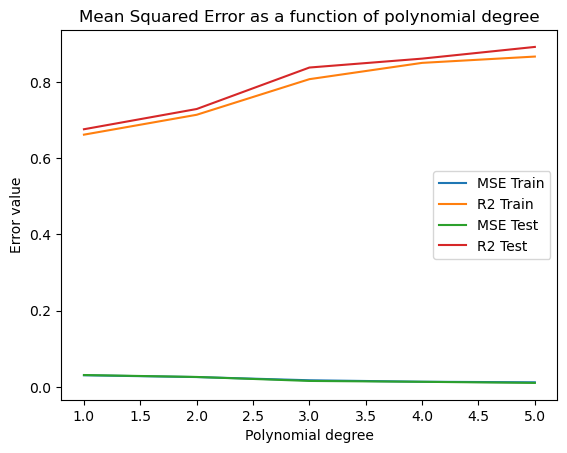

In [8]:
# Generate the data
np.random.seed(42)
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

# Scaling of our data.
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x.reshape(-1,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

x_combined = np.hstack((x_scaled, y_scaled))

# Split the data into training and test data
x_train, x_test, z_train, z_test = train_test_split(x_combined, Z, test_size=0.2)


def prep_poly_feartures(x, degree):
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(x)
  return X_poly 


def poly_regression_and_mse(degree, X_train, z_train, x_test, z_test):
  X_poly_train = prep_poly_feartures(X_train, degree)
  model = LinearRegression()
  model.fit(X_poly_train, z_train)

  z_pred_train = model.predict(X_poly_train)

  x_poly_test = prep_poly_feartures(x_test, degree)
  z_pred_test = model.predict(x_poly_test)
  
  betas = model.coef_
  
  mse_train = mean_squared_error(z_train, z_pred_train)
  mse_test = mean_squared_error(z_test, z_pred_test)

  r2_train = r2_score(z_train, z_pred_train)
  r2_test = r2_score(z_test, z_pred_test)
  
  return mse_train, mse_test, r2_train, r2_test, betas
  
mse_train_results = {}
mse_test_results = {}
r2_train_results = {}
r2_test_results = {}
beta_values = []

for degree in range(1,6):
  mse_train, mse_test, r2_train, r2_test, beta = poly_regression_and_mse(degree, x_train, z_train, x_test, z_test)
  mse_train_results[degree] = mse_train
  r2_train_results[degree] = r2_train
  mse_test_results[degree] = mse_test
  r2_test_results[degree] = r2_test
  beta_values.append(beta)

plt.figure()

plt.plot(list(mse_train_results.keys()), list(mse_train_results.values()), label="MSE Train")
plt.plot(list(r2_train_results.keys()), list(r2_train_results.values()), label="R2 Train")


plt.plot(list(mse_test_results.keys()), list(mse_test_results.values()), label="MSE Test")
plt.plot(list(r2_test_results.keys()), list(r2_test_results.values()), label="R2 Test")

plt.xlabel('Polynomial degree')
plt.ylabel('Error value')
plt.title('Mean Squared Error as a function of polynomial degree')
plt.legend()
plt.show()


## Observations.
Both the error metrics, mse and r2, are moving in the desired direction. From the plot the mse is moving towards 0 which is what we want. The closer it gets to zero, the better the fit, which is the trend in our case. We also notice that the fit gets better when we increase the complexity of out model. When we increase the polynomial degree, we introduce higher flexibility and a better ability to learn more complex patterns.

We also notice that r2 is moving towards 1, which is what we want. Much of the same we discussed above, applies to the r2 score. Higher complexity allows more flexibility and the model can better capture variability in the data, as well as more complex patterns.

citation: HASTIE et.al

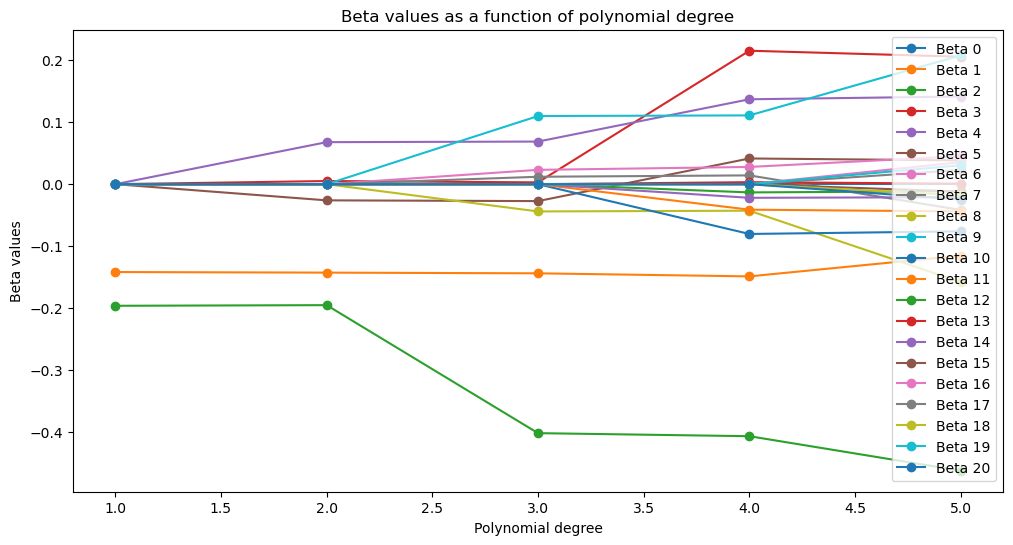

In [7]:
max_len = max(len(b) for b in beta_values)

# Pad the shorter beta arrays with zeros so they all have the same length
beta_values_padded = np.array([np.pad(b, (0, max_len - len(b)), 'constant') for b in beta_values])
plt.figure(figsize=(12,6))

for i in range(beta_values_padded.shape[1]):
    plt.plot(range(1,6), beta_values_padded[:, i], marker='o', label=f'Beta {i}')

plt.xlabel('Polynomial degree')
plt.ylabel('Beta values')
plt.title('Beta values as a function of polynomial degree')

plt.legend()
plt.show()


## Observations
As the growth follows a binomial expansion we get 21 different beta values, which is reasonable because 
$$d = degrees$$
$$ Num Of Terms = \frac{(d+2)(d+1)}{2}$$

As the model gets more complex we get an increase in the number of coefficients. 
And we also observe that when the polynomial degree increase, the beta values also increases. 
Some certain terms in the intermediate degrees have larger beta values. this could be to the models local peaks/dips.
We also notice that the beta's are centered around origin. This is most likely due to how the x and y values are distributed.

The signs of the coeffiecients fluctuate, which is typical for polynomial regression models, especially higher-order ones.

